![alt text](https://d1afx9quaogywf.cloudfront.net/sites/default/files/Logos/YouTube.png)

# What makes a Youtube Video End Up on the Trending Page?

By: Daniel Kim, Katherine Sebina, and Mufaro Shumba



# Introduction

**Background**

YouTube is the world’s largest and most famous video-sharing platform. It serves millions of concurrent users everyday and has vast influence on customer behavior, beliefs and opinions. YouTube is a free to use service and can be a great space for people to discover things they like. For many people, YouTube is used to watch music videos, comedy shows, how to guides, recipes, hacks and more. Maximizing video performance has gained tangible economic value *and* many comapnies use it to gain awareness and accumulate interest in their products and services. YouTube maintains a list of the top trending videos on the platform, and updates it every 15 minutes. YouTube notes that they create the trending list to use a combination of the following factors to determine top-trending videos:
*   **View Count**
*   **Temperature - How fast video gains views** 
*   **View Distribution - Where and when the video is viewed** 
*   **Age of the Video**

View count
How fast the video generates views (i.e. “temperature”)
Where views are coming from, including outside of YouTube
The age of the video

In this study, we aim to analyze certain characteristics of YouTube videos, and determine why they make a video go trending. In recent news, some of Youtube's top creators have  [challenged](https://reclaimthenet.org/youtube-trending-tab-exposed/ "Youtube's Trending Exposed") how Youtube creates their daily trending page. In the creator's critiques of Youtube's trending list they often say that it's just a way for Youtube to promote traditional media outlets, and ignore it's original creators. In this Jupyter Notebook, we will try to dig deeper into the trending page and make some suggestions to both content creators and Youtube to better the trending page. 

### Definitions
*   **Content Creator:** Someone who originally started on Youtube and their primary outreach is through YouTube 
*   **Traditional Media:** A show on TV, newspaper, or website that got their celebrity status BEFORE YouTube, or Corporation trying to leverage YouTube for the purposes of getting you off site


# Getting Started


These are the required imported libraries we used:
*   [**Pandas:**](https://pandas.pydata.org/) used for data display and partitioning
*   [**IO:**](https://docs.python.org/3/library/io.html) facilities for dealing with various types of I/O.
*   [**Seaborn:**](https://seaborn.pydata.org/introduction.html) provides a high-level interface for graphics on top of Matplotlib
*   [**Matplotlib - pyplot:**](https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html) used for plotting Pandas data into graphs and charts
*   [**Numpy:**](https://numpy.org/) adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions
*   [**Datetime:**](https://docs.python.org/3/library/datetime.html) supplies classes for manipulating dates and times
*   [**Scipy:**](https://docs.scipy.org/doc/scipy/reference/tutorial/) library used for scientific computing and technical computing
*   [**NLTK:**](https://www.nltk.org/) Natural Language Toolkit for n-grams
*   [**TextBlob:**](https://textblob.readthedocs.io/en/dev/)  library for processing textual data




In [0]:
import pandas as pd
from google.colab import files
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import operator
import datetime
from scipy import stats
from textblob import TextBlob

# Preprocessing Data

Load .csv file and display the first 5 rows to get a sense of what is contained in the dataset. Although this source contains data for a wide variety of countries, we decided to focus on the United States.

In [0]:
uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['USvideos.csv']))

data.head()

Saving USvideos.csv to USvideos.csv


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,1ZAPwfrtAFY,17.13.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",993345,65551,3544,8128,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
1,5qpjK5DgCt4,17.13.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",2568721,132724,4495,7494,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
2,puqaWrEC7tY,17.13.11,Nickleback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",118585,6183,361,1374,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
3,d380meD0W0M,17.13.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",1867990,123933,1836,16635,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,nc99ccSXST0,17.13.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",669608,21357,591,3050,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....


# Data Tidying

The category id currently contains 44 unique ids to indicate what genre or category the video falls under. These ids are numbers which cannot be easily interpreted therefore we decided to tidy our data by changing the category_id to a representable label.

In [0]:
data['category_id'] = data['category_id'].astype('str')

for rows in data.iterrows():
  cat_id = rows[1]['category_id']

  if cat_id == "1":
    data.at[rows[0],'category_id'] = "Film & Animation"
  elif cat_id == "2":
    data.at[rows[0],'category_id'] = "Autos & Vehicles"
  elif cat_id == "10":
    data.at[rows[0],'category_id'] = "Music"
  elif cat_id == "15":
    data.at[rows[0],'category_id'] = "Pets & Animals"
  elif cat_id == "17":
    data.at[rows[0],'category_id'] = "Sports"
  elif cat_id == "18":
    data.at[rows[0],'category_id'] = "Short Movies"
  elif cat_id == "19":
    data.at[rows[0],'category_id'] = "Travel & Events"
  elif cat_id == "20":
    data.at[rows[0],'category_id'] = "Gaming"
  elif cat_id == "21":
    data.at[rows[0],'category_id'] = "Videoblogging"
  elif cat_id == "22":
    data.at[rows[0],'category_id'] = "People & Blogs"
  elif cat_id == "23":
    data.at[rows[0],'category_id'] = "Comedy"
  elif cat_id == "24":
    data.at[rows[0],'category_id'] = "Entertainment"
  elif cat_id == "25":
    data.at[rows[0],'category_id'] = "News & Politics"
  elif cat_id == "26":
    data.at[rows[0],'category_id'] = "Howto & Style"
  elif cat_id == "27":
    data.at[rows[0],'category_id'] = "Education"
  elif cat_id == "28":
    data.at[rows[0],'category_id'] = "Science & Technology"
  elif cat_id == "29":
    data.at[rows[0],'category_id'] = "Nonprofits & Activism"
  elif cat_id == "30":
    data.at[rows[0],'category_id'] = "Movies"
  elif cat_id == "31":
    data.at[rows[0],'category_id'] = "Anime/Animation"
  elif cat_id == "32":
    data.at[rows[0],'category_id'] = "Action/Adventure"
  elif cat_id == "33":
    data.at[rows[0],'category_id'] = "Classics"
  elif cat_id == "34":
    data.at[rows[0],'category_id'] = "Comedy"
  elif cat_id == "35":
    data.at[rows[0],'category_id'] = "Documentary"
  elif cat_id == "36":
    data.at[rows[0],'category_id'] = "Drama"
  elif cat_id == "37":
    data.at[rows[0],'category_id'] = "Family"
  elif cat_id == "38":
    data.at[rows[0],'category_id'] = "Foreign"
  elif cat_id == "39":
    data.at[rows[0],'category_id'] = "Horror"
  elif cat_id == "40":
    data.at[rows[0],'category_id'] = "Sci-Fi/Fantasy"
  elif cat_id == "41":
    data.at[rows[0],'category_id'] = "Thriller"
  elif cat_id == "42":
    data.at[rows[0],'category_id'] = "Shorts"
  elif cat_id == "43":
    data.at[rows[0],'category_id'] = "Shows"
  elif cat_id == "44":
    data.at[rows[0],'category_id'] = "Trailers"
  
data.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,1ZAPwfrtAFY,17.13.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",993345,65551,3544,8128,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
1,5qpjK5DgCt4,17.13.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",2568721,132724,4495,7494,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
2,puqaWrEC7tY,17.13.11,Nickleback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",118585,6183,361,1374,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
3,d380meD0W0M,17.13.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",1867990,123933,1836,16635,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,nc99ccSXST0,17.13.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,Science & Technology,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",669608,21357,591,3050,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....


Remove rows that includes a video with a video_id of #NAME? because this is bad data

In [0]:
data = data[data.video_id != "#NAME?"]

To do some sort of data cleaning, we put an empty string in place of each null value in the description column

In [0]:
data["description"] = data["description"].fillna(value="")

# EDA

This graph displays the amount of trending videos in the most popular categories.

Text(0.5, 1.0, 'Catogories of trend videos in US')

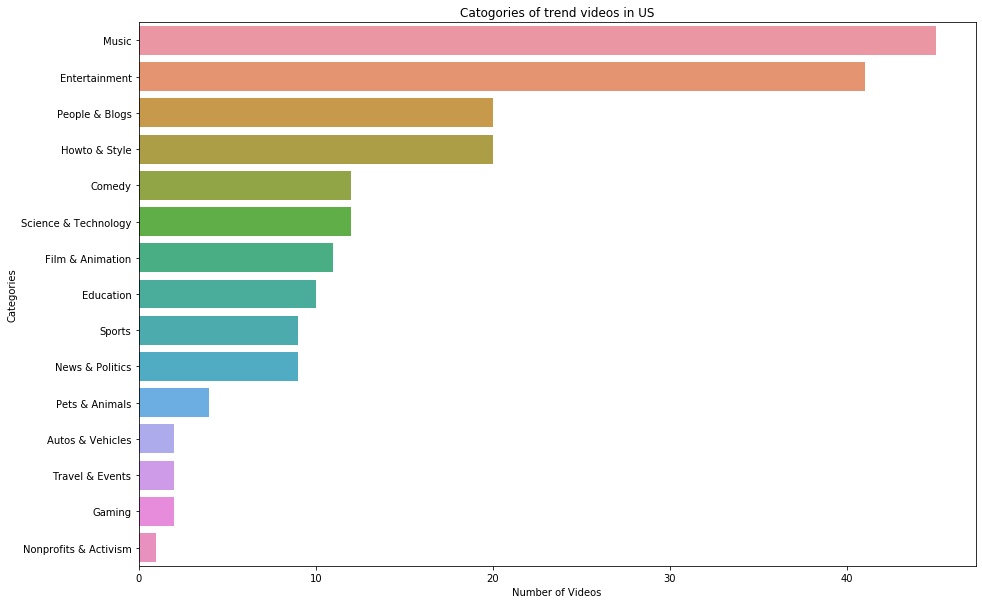

In [0]:

categories_videos_df = data['category_id'].value_counts().reset_index()
plt.figure(figsize=(15,10))
ax = sns.barplot(x=categories_videos_df['category_id'],y=categories_videos_df['index'], data=categories_videos_df,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in US")

These bar graphs below will represent the relationship between time and date published and whether or not the video will begin trending. The publish_time is column is represented in a datetime objected therefore we must strip and seperate the day and time into two different columns.We added two columns to represent the date and hour of publishing each video.

In [0]:
data["publishing_day"] = data["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
data["publishing_hour"] = data["publish_time"].apply(lambda x: x[11:13])

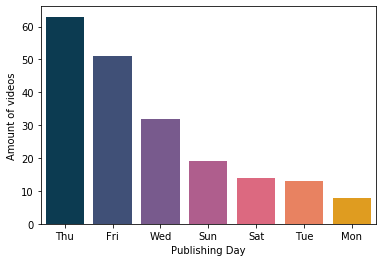

In [0]:
publishing_day_df = data["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "Amount_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="Amount_of_videos", data=publishing_day_df, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="Amount of videos")


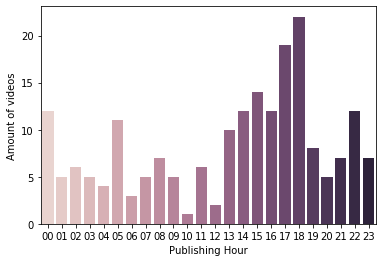

In [0]:
publishing_hour_df = data["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "Amount_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="Amount_of_videos", data=publishing_hour_df, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="Amount of videos")

**Sentiment Analysis of Description**

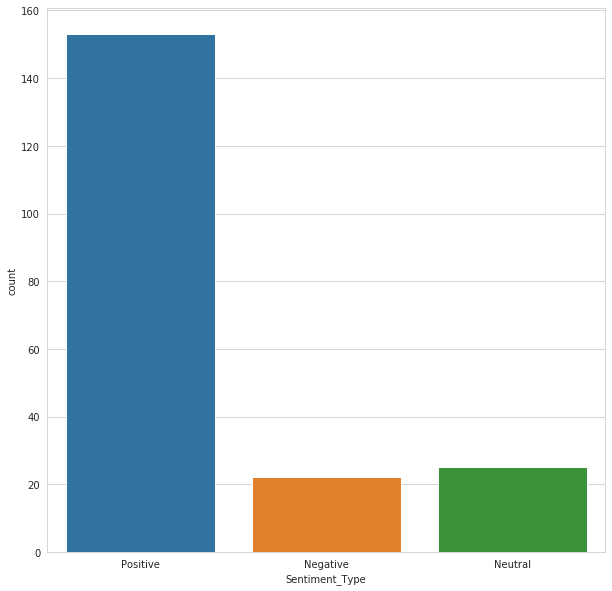

In [0]:
bloblist_description = list()

vids_description=data['description'].astype(str)

def f(polarity_descriptions):
    if polarity_descriptions['sentiment'] > 0:
        val = "Positive"
    elif polarity_descriptions['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val
    
for row in vids_description:
    blob = TextBlob(row)
    bloblist_description.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    polarity_descriptions = pd.DataFrame(bloblist_description, columns = ['sentence','sentiment','polarity'])

polarity_descriptions['Sentiment_Type'] = polarity_descriptions.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=polarity_descriptions)

**Sentiment Analysis of Title**

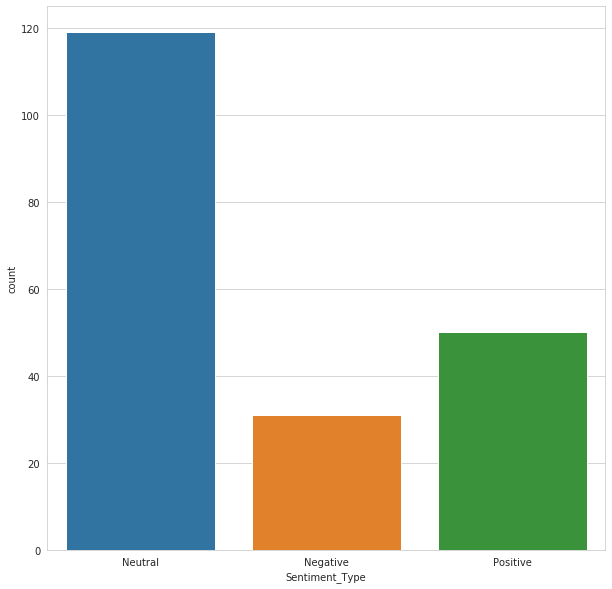

In [0]:
bloblist_title = list()

video_titles = data['title']

def f_title(polarity_titles):
    if polarity_titles['sentiment'] > 0:
        val = "Positive"
    elif polarity_titles['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val
    
for row in video_titles:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    polarity_titles = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 


polarity_titles['Sentiment_Type'] = polarity_titles.apply(f_title, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=polarity_titles)

# Video Analysis
**Analyzing video characteristics based on amount of times trending**

Looking through the dataset, we saw that multiple videos apppear multiple times 
in the dataset becuase they were trending for several days. This was interesting to investigate becuase we wanted to see which quantitative characteristic (likes, views, dislikes, comment count) is the most influential in the Youtube algorithm for trending videos. 

In order to analyze the video characteristics based on this parameter, I first determined the amount of times each video was trending in the dataset.

**Calculating trending occurence for each video**

In this cell, the '*vid_occ*' variable is a dictionary that has the the unique video IDs as the keys, and the amount of times the video appears in the dataset as the values.

In [0]:
# Determine the amount of times the same video occurs in this table
# 'count' represents the amount of times a singular video has been trending from 01/17/12
# vid_occ is a dictionary, keys are video IDs, values are the 'count'
# 'count' is updated for each video ID

video_ids = data['video_id']
keys = video_ids.drop_duplicates()

vid_occ = dict.fromkeys(keys, 0)

# Calculate the amount of times 'vid' appears in the dataset.
for vid in keys:
  count = 0
  for other_vid in video_ids:
    if vid == other_vid:
      count += 1
  vid_occ[vid] = count


'*rows_info*' is a dictionary that has the unique video IDs as the keys, and values are dataframes that contain all the rows in the dataset that have the corresponding video ID. '*rows_info*' is just a simple way to contain all the information for each unique video ID.



In [0]:
indeces = []
values = []

for idx, val in vid_occ.items():
  if val >= 1:
    indeces.append(idx)
    values.append(val)

rows_info = dict.fromkeys(indeces, 0)

video_df = data.set_index('video_id')

for idx in indeces:
  rows_info[idx] = video_df.loc[idx]


In [0]:
# Each bucket corresponds to the data for a particular trending video
# These are the videos in the rows_info dictionary
# These buckets are going to be used in the analysis portion
num_trend = []
views = []
likes = []
dislikes = []
comment_count = []
category_id = []
channel_title = []
vid_title = []
pub_date = []
trend_date = []
indeces = []

tags= []
description=[]
title = []
titleAsString = []
descriptionAsString = []
tagsAsString = []

channel_title_views = {}

channel_title_views_creators = {}

for idx, rows in rows_info.items():
  # Get the most recent video in the dataset
  # (i.e., the video with the most views, likes, dislikes, etc.)
  curr = rows.iloc[(rows.shape)[0] - 1] 
  if type(curr) == pd.Series:
    indeces.append(idx)
    num_trend.append(rows.shape[0])
    views.append(curr['views'])
    likes.append(curr['likes'])
    dislikes.append(curr['dislikes'])
    comment_count.append(curr['comment_count'])
    category_id.append(curr['category_id'])
    channel_title.append(curr['channel_title'])
    vid_title.append(curr['title'])
    pub_date.append(curr['publish_time'])
    trend_date.append(curr['trending_date'])
    title.append(curr['title'].lower().strip().replace('|','').split())
    titleAsString.append(curr['title'].lower().strip().replace('|',''))

    tags.append(curr['tags'].lower().strip().replace('"', '').replace('|','').split())
    tagsAsString.append(curr['tags'].lower().strip().replace('"', '').replace('|',''))

    curChannel = curr['channel_title'] 
    curViews = curr['views']
    if (curChannel in channel_title_views):
      channel_title_views[curChannel]+=curViews
    else:
      channel_title_views[curChannel] = curViews



    if(type(curr['description']) is str):
        descriptionAsString.append(curr['description'].lower().strip().replace('"', ''))
        description.append(curr['description'].lower().strip().replace('"', '').split())
    else:
        #No description
        description.append(" ")

'*attr_df*' is the dataframe that is comprised of the lists computed in the previous cell. To clean the dataframe, any row with a value of 0 is removed from the dataset. On these videos, either the likes, dislikes, or comments were disabled, which makes that particular data inconclusive for our analysis.

In [0]:
attr_df = pd.DataFrame(list(zip(num_trend, views, likes, dislikes, comment_count, category_id, channel_title, vid_title, pub_date, trend_date)), 
                       index = indeces, 
                       columns = ['trending_occ', 
                                  'views', 'likes', 'dislikes', 
                                  'comment_count', 'category_id',
                                  'channel_title', 'title',
                                  'publish_time', 'trending_date'])

attr_df = attr_df[attr_df.likes != 0]
attr_df = attr_df[attr_df.dislikes != 0]
attr_df = attr_df[attr_df.comment_count != 0]

attr_df.head()
    

,trending_occ,views,likes,dislikes,comment_count,category_id,channel_title,title,publish_time,trending_date
6ZfuNTqbHE8,9,37736281,1735895,21969,241237,Entertainment,Marvel Entertainment,Marvel Studios' Avengers: Infinity War Officia...,2017-11-29T13:26:24.000Z,17.30.11
XbuQAbG2AZ0,5,868868,21005,988,2543,News & Politics,The New York Times,"Jay-Z and Dean Baquet, in Conversation",2017-11-30T14:30:00.000Z,17.05.12
evhLzq7Gsak,2,971123,6325,2512,5824,News & Politics,TODAY,Matt Lauer Has Been Fired From NBC News | TODAY,2017-11-29T14:42:32.000Z,17.30.11
KXHrCBkIxQQ,8,197900,2394,372,432,Entertainment,Sony Pictures Entertainment,ALL THE MONEY IN THE WORLD - Official Trailer ...,2017-11-29T20:00:53.000Z,17.30.11
TsT5GLWgSkU,5,1008131,83790,2884,5274,Comedy,jacksfilms,Reacting to Avengers: Infinity War trailer,2017-11-29T23:25:44.000Z,17.05.12


# Video Characteristics vs Trending Occurence (Amount of times trending)

We hypotheize that as the trending occurence increases, the likes, dislikes, comment count, and views will all increase as well. Further in this portion of the file, we perform exploratory data analysis to prove or disprove this hypothesis.

Text(0, 0.5, 'Views')

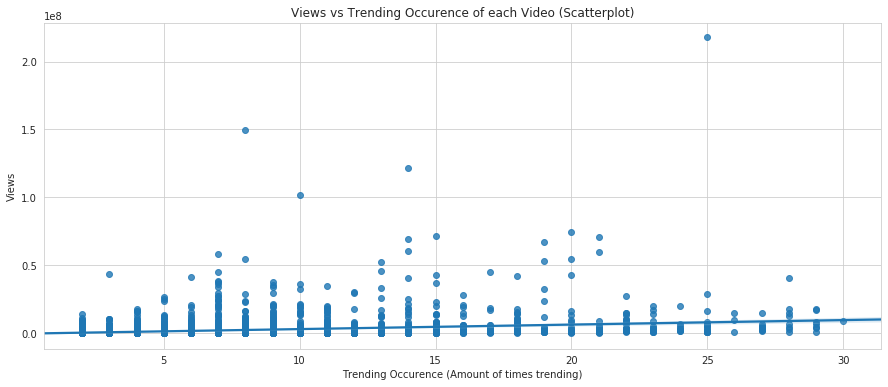

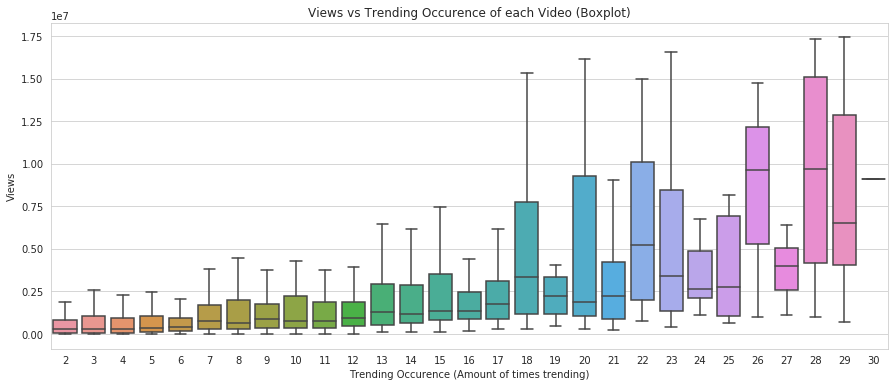

In [0]:
plt.figure(figsize=(15, 6))
ax = sns.regplot(x = 'trending_occ', y = 'views', data = attr_df)
plt.title('Views vs Trending Occurence of each Video (Scatterplot)')
plt.xlabel('Trending Occurence (Amount of times trending)')
plt.ylabel('Views')

plt.figure(figsize=(15, 6))
ax = sns.boxplot(x = 'trending_occ', y = 'views', data = attr_df, showfliers=False)
plt.title('Views vs Trending Occurence of each Video (Boxplot)')
plt.xlabel('Trending Occurence (Amount of times trending)')
plt.ylabel('Views')

Text(0, 0.5, 'Likes')

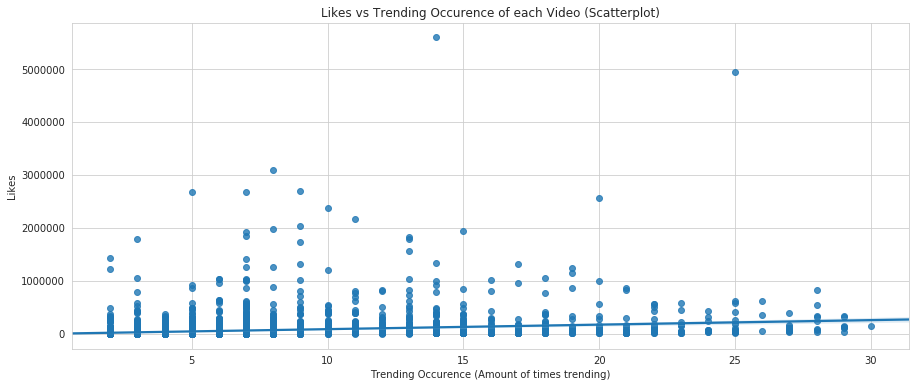

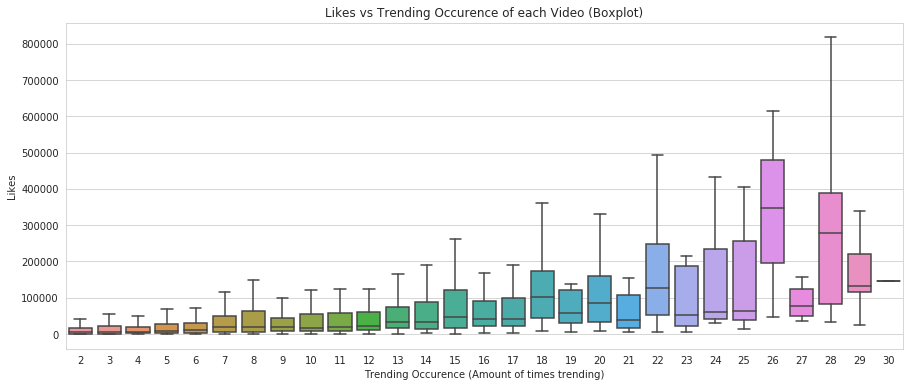

In [0]:
plt.figure(figsize=(15, 6))
ax = sns.regplot(x = 'trending_occ', y = 'likes', data = attr_df)
plt.title('Likes vs Trending Occurence of each Video (Scatterplot)')
plt.xlabel('Trending Occurence (Amount of times trending)')
plt.ylabel('Likes')

plt.figure(figsize=(15, 6))
ax = sns.boxplot(x = 'trending_occ', y = 'likes', data = attr_df, showfliers=False)
plt.title('Likes vs Trending Occurence of each Video (Boxplot)')
plt.xlabel('Trending Occurence (Amount of times trending)')
plt.ylabel('Likes')

Text(0, 0.5, 'Dislikes')

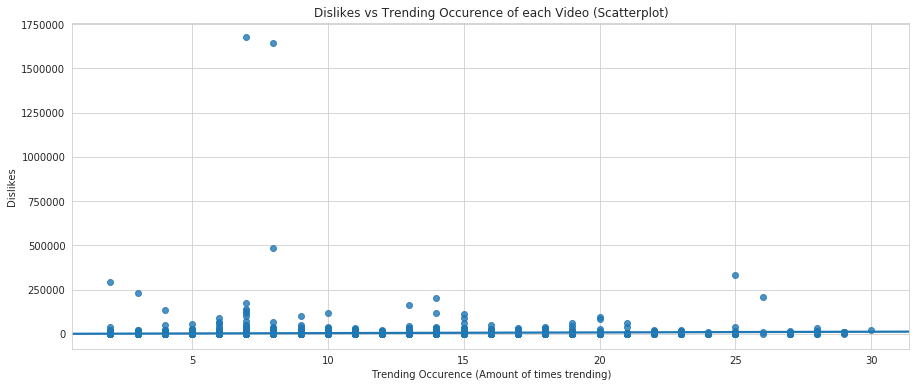

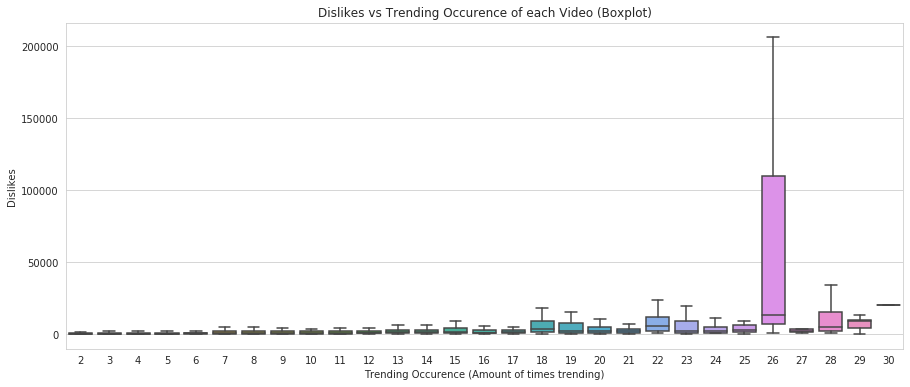

In [0]:
plt.figure(figsize=(15, 6))
ax = sns.regplot(x = 'trending_occ', y = 'dislikes', data = attr_df)
plt.title('Dislikes vs Trending Occurence of each Video (Scatterplot)')
plt.xlabel('Trending Occurence (Amount of times trending)')
plt.ylabel('Dislikes')

plt.figure(figsize=(15, 6))
ax = sns.boxplot(x = 'trending_occ', y = 'dislikes', data = attr_df, showfliers=False)
plt.title('Dislikes vs Trending Occurence of each Video (Boxplot)')
plt.xlabel('Trending Occurence (Amount of times trending)')
plt.ylabel('Dislikes')

Text(0, 0.5, 'Comment Count')

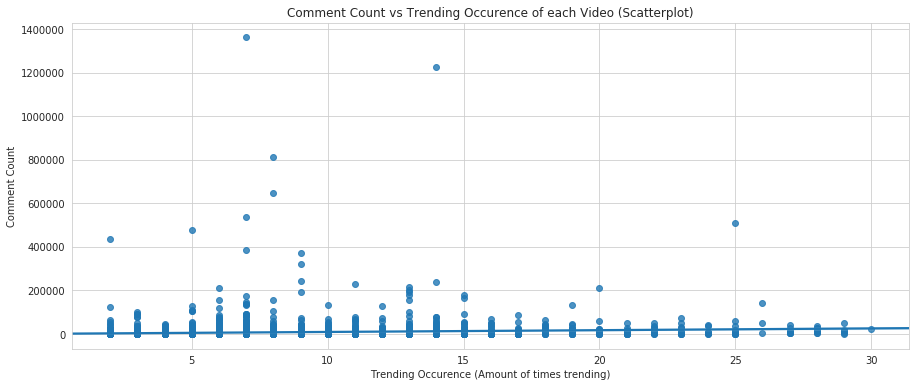

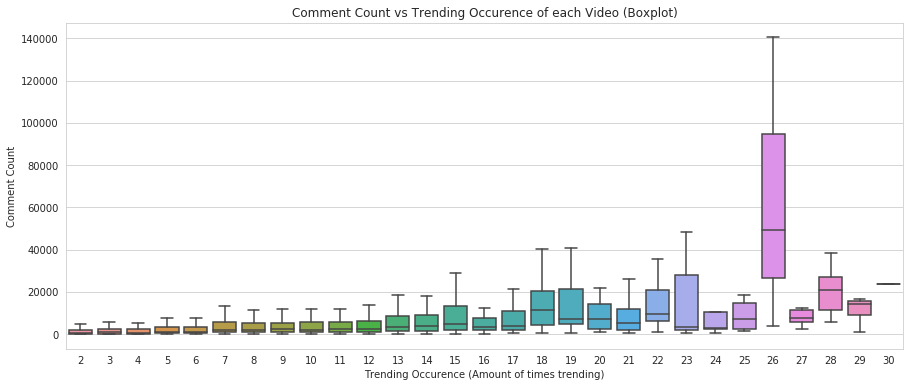

In [0]:
plt.figure(figsize=(15, 6))
ax = sns.regplot(x = 'trending_occ', y = 'comment_count', data = attr_df)
plt.title('Comment Count vs Trending Occurence of each Video (Scatterplot)')
plt.xlabel('Trending Occurence (Amount of times trending)')
plt.ylabel('Comment Count')

plt.figure(figsize=(15, 6))
ax = sns.boxplot(x = 'trending_occ', y = 'comment_count', data = attr_df, showfliers=False)
plt.title('Comment Count vs Trending Occurence of each Video (Boxplot)')
plt.xlabel('Trending Occurence (Amount of times trending)')
plt.ylabel('Comment Count')

**Analysis of Video Characteristics vs Trending Occurence**

In all four scatter plots, it is difficult to see a trend in the view, comment count, likes, or dislikes per video as the trending occurence increases or descreases. This largely has to do with outliers that makes it difficult to view the data. 

The boxplot also has issues with outliers. The '*Dislikes vs Trending Occurence of each Video (Boxplot)*' and '*Comment Count vs Trending Occurence of each Video (Boxplot)*' graphs have outliers that drastically change the range of the boxplot. Further in the file more cleaning is done to have a better graphs.

# Removing outliers

In each of the following cells, the outliers are removed within the lower 15% and upper 15% quartiles. New dataframes are created for each video characteristic.

Text(0, 0.5, 'Comment Count (No outliers)')

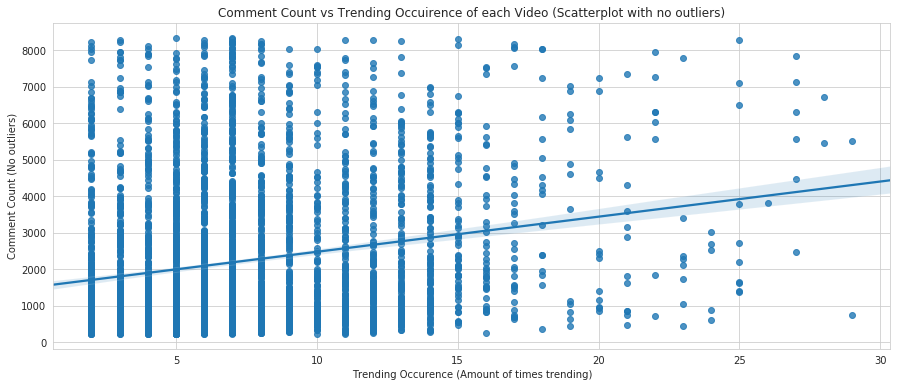

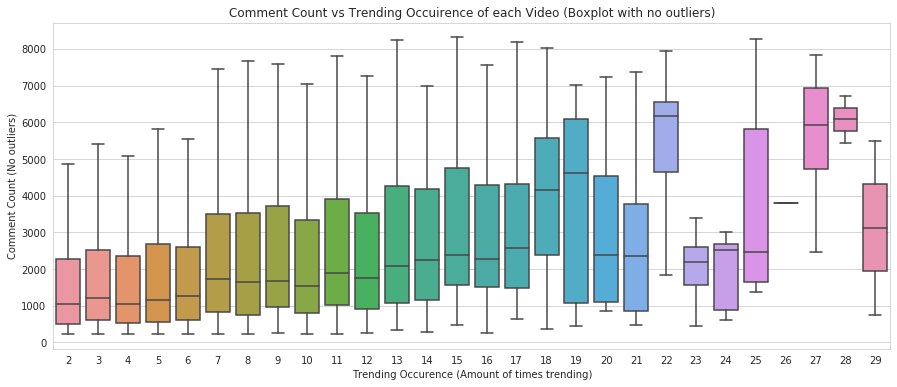

In [0]:
comment_count = attr_df[['comment_count']].copy()
comment_count = comment_count.sort_values(by = ['comment_count'])
x = comment_count['comment_count']
inner = x[x.between(x.quantile(.15), x.quantile(.85))] # without outliers
comment_count = inner.to_frame()

trending = []

for row_a in comment_count.iterrows():
  trending.append(attr_df.loc[row_a[0], 'trending_occ'])

comment_count['trending_occ'] = trending
comment_count.head()

plt.figure(figsize=(15, 6))
ax = sns.regplot(x = 'trending_occ', y = 'comment_count', data = comment_count)
plt.title('Comment Count vs Trending Occuirence of each Video (Scatterplot with no outliers)')
plt.xlabel('Trending Occurence (Amount of times trending)')
plt.ylabel('Comment Count (No outliers)')


plt.figure(figsize=(15, 6))
ax = sns.boxplot(x = 'trending_occ', y = 'comment_count', data = comment_count, showfliers=False)
plt.title('Comment Count vs Trending Occuirence of each Video (Boxplot with no outliers)')
plt.xlabel('Trending Occurence (Amount of times trending)')
plt.ylabel('Comment Count (No outliers)')


Text(0, 0.5, 'Dislikes (No outliers)')

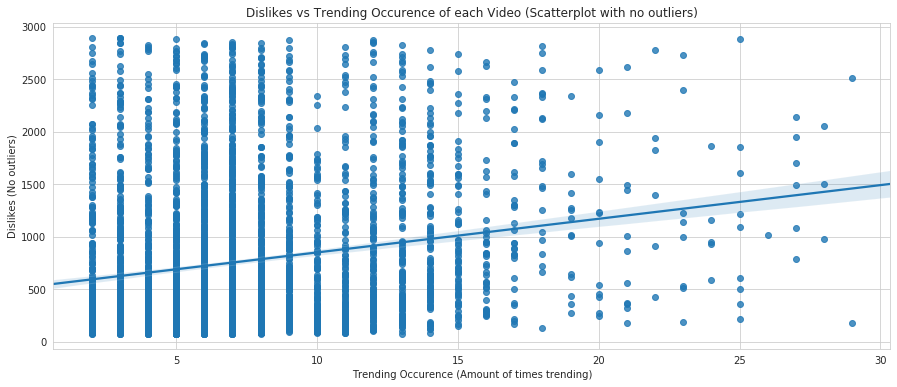

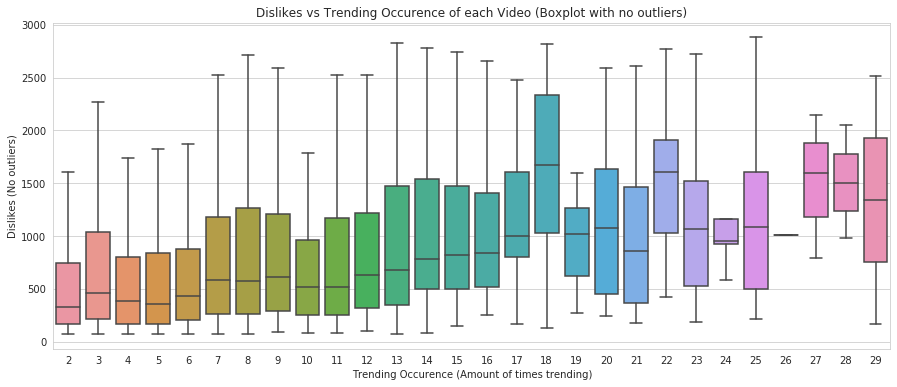

In [0]:
dislikes = attr_df[['dislikes']].copy()
dislikes = dislikes.sort_values(by = ['dislikes'])
x = dislikes['dislikes']
inner = x[x.between(x.quantile(.15), x.quantile(.85))] # without outliers
dislikes = inner.to_frame()

trending = []

for row_a in dislikes.iterrows():
  trending.append(attr_df.loc[row_a[0], 'trending_occ'])

dislikes['trending_occ'] = trending
dislikes.head()

plt.figure(figsize=(15, 6))
ax = sns.regplot(x = 'trending_occ', y = 'dislikes', data = dislikes)
plt.title('Dislikes vs Trending Occurence of each Video (Scatterplot with no outliers)')
plt.xlabel('Trending Occurence (Amount of times trending)')
plt.ylabel('Dislikes (No outliers)')

plt.figure(figsize=(15, 6))
ax = sns.boxplot(x = 'trending_occ', y = 'dislikes', data = dislikes, showfliers=False)
plt.title('Dislikes vs Trending Occurence of each Video (Boxplot with no outliers)')
plt.xlabel('Trending Occurence (Amount of times trending)')
plt.ylabel('Dislikes (No outliers)')

Text(0, 0.5, 'Likes (No outliers)')

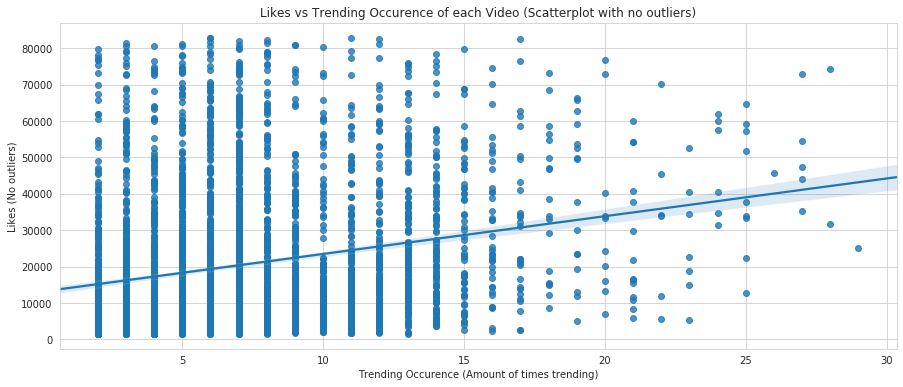

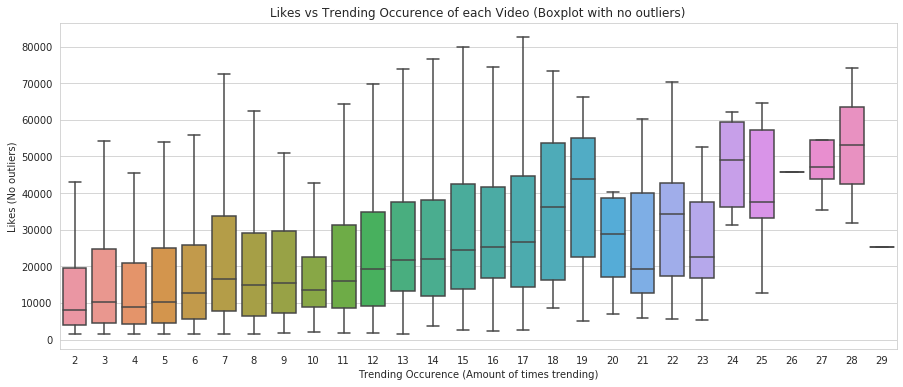

In [0]:
likes = attr_df[['likes']].copy()
likes = likes.sort_values(by = ['likes'])
x = likes['likes']
inner = x[x.between(x.quantile(.15), x.quantile(.85))] # without outliers
likes = inner.to_frame()

trending = []

for row_a in likes.iterrows():
  trending.append(attr_df.loc[row_a[0], 'trending_occ'])

likes['trending_occ'] = trending
likes.head()

plt.figure(figsize=(15, 6))
ax = sns.regplot(x = 'trending_occ', y = 'likes', data = likes)
plt.title('Likes vs Trending Occurence of each Video (Scatterplot with no outliers)')
plt.xlabel('Trending Occurence (Amount of times trending)')
plt.ylabel('Likes (No outliers)')

plt.figure(figsize=(15, 6))
ax = sns.boxplot(x = 'trending_occ', y = 'likes', data = likes, showfliers=False)
plt.title('Likes vs Trending Occurence of each Video (Boxplot with no outliers)')
plt.xlabel('Trending Occurence (Amount of times trending)')
plt.ylabel('Likes (No outliers)')

Text(0, 0.5, 'Views (No outliers)')

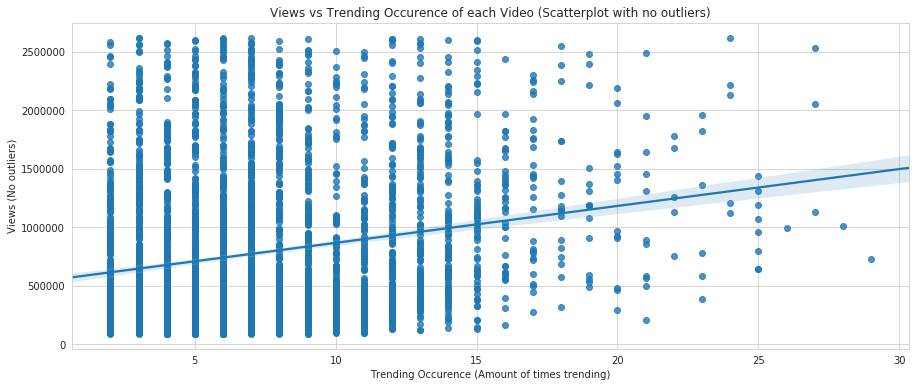

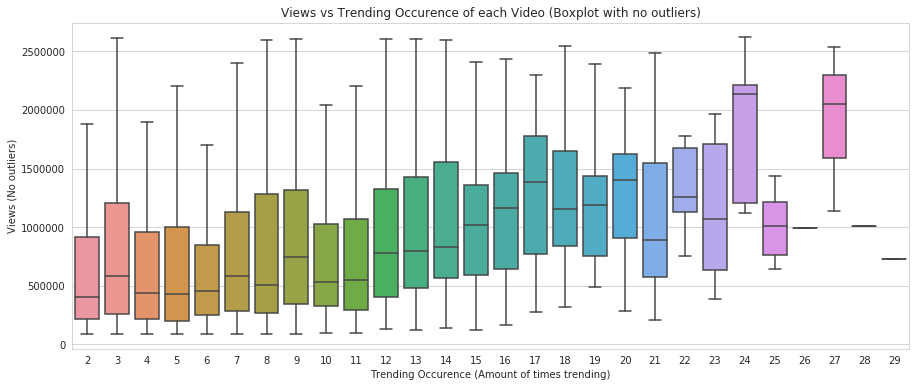

In [0]:
views = attr_df[['views']].copy()
views = views.sort_values(by = ['views'])
x = views['views']
inner = x[x.between(x.quantile(.15), x.quantile(.85))] # without outliers
views = inner.to_frame()

trending = []

for row_a in views.iterrows():
  trending.append(attr_df.loc[row_a[0], 'trending_occ'])

views['trending_occ'] = trending
views.head()

plt.figure(figsize=(15, 6))
ax = sns.regplot(x = 'trending_occ', y = 'views', data = views)
plt.title('Views vs Trending Occurence of each Video (Scatterplot with no outliers)')
plt.xlabel('Trending Occurence (Amount of times trending)')
plt.ylabel('Views (No outliers)')

plt.figure(figsize=(15, 6))
ax = sns.boxplot(x = 'trending_occ', y = 'views', data = views, showfliers=False)
plt.title('Views vs Trending Occurence of each Video (Boxplot with no outliers)')
plt.xlabel('Trending Occurence (Amount of times trending)')
plt.ylabel('Views (No outliers)')

**Anaylsis of data with outliers removed**

After removing the outliers, it is easier to see the positive trend in video characteristics vs the trending occurence. As we hypothesized, as the video trending occurence increases, the likes, dislikes, views, and comment count increases. Utilizing the '*between*' function, removing the outliers from each video characteristic was relatively easy.

Looking at the boxplots, the Views and Likes graphs had the largest gap in median views and likes compared to videos that trended less. If you observe the '*Views vs Trending Occurence of each Video (Boxplot with no outliers)*' graph, you can see that the videos with trending occurence 27 and 24 had a much larger median compared to the rest of the video trending occurence values. In addition, the '*Likes vs Trending Occurence of each Video (Boxplot with no outliers)*' graph also has a similar relationship, where the videos with trending occurence values of 24-28 have a median larger than the videos with a smaller trending occurence value. 

The other two graphs, '*Dislikes vs Trending Occurence of each Video (Boxplot with no outliers)*' and '*Comment Count vs Trending Occuirence of each Video (Boxplot with no outliers)*', did not have as clear of a relationship, and the videos with larger trending occurences did not necessarily have a larger median.

# Trending vs Popular
In this section we will explore the channels and type's of videos that often end up on the trending page. 

#### Helper Functions

In [0]:
def most_frequent_channel(lst): 
    dictRet = {}
    for channel in lst:
        if(channel in dictRet):
            dictRet[channel]+= 1
        else:
            dictRet[channel]=1
    return dictRet

import re
from nltk.util import ngrams

def make_n_gram(s,n):
    s = s.lower()
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    tokens = [token for token in s.split(" ") if token != ""]
    output = list(ngrams(tokens, n))
    return output

def most_frequent(lst): 
    dictRet = {}
    for lst2 in lst:
        for z in lst2:
            if(z in dictRet):
                dictRet[z]+= 1
            else:
                dictRet[z]=1
    return dictRet

In [0]:
titleList=[]

for s in titleAsString:
    titleList.append(make_n_gram(s,3))
    
trendingTitlesNGram = most_frequent(titleList)

sortedNGramTitle = sorted(trendingTitlesNGram, key=trendingTitlesNGram.get, reverse = True)
commonCreator = most_frequent_channel(attr_df['channel_title'].values)
commonCreatorsDict = sorted(commonCreator, key=commonCreator.get, reverse = True)

creatorsViewsDf=pd.DataFrame(columns=['Creator', 'Times trending'])
commonCreatorsDf = pd.DataFrame(columns=['Creator', 'Times trending'])
nGramDf = pd.DataFrame(columns=['3-gram', 'Quantity'])
for creator in commonCreatorsDict:
    commonCreatorsDf=commonCreatorsDf.append(pd.Series([creator,commonCreator[creator]],index=commonCreatorsDf.columns ),ignore_index=True)
for nGram in sortedNGramTitle:
  nGramDf=nGramDf.append(pd.Series([nGram,trendingTitlesNGram[nGram]],index=nGramDf.columns ),ignore_index=True)
for creator in channel_title_views:
  creatorsViewsDf=creatorsViewsDf.append(pd.Series([creator,channel_title_views[creator]],index=creatorsViewsDf.columns),ignore_index=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: generator 'ngrams' raised StopIteration


In [0]:
nGramDf.head(10)

,3-gram,Quantity
0,"(official, trailer, hd)",57
1,"(official, music, video)",54
2,"(how, to, make)",37
3,"(the, last, jedi)",35
4,"(trailer, hd, netflix)",30
5,"(star, wars, the)",23
6,"(wars, the, last)",22
7,"(avengers, infinity, war)",21
8,"(official, lyric, video)",20
9,"(first, take, espn)",20


In [0]:
commonCreatorsDf.head(10)

,Creator,Times trending
0,ESPN,53
1,Netflix,44
2,NBA,39
3,Jimmy Kimmel Live,38
4,Vox,34
5,The Late Show with Stephen Colbert,34
6,The Tonight Show Starring Jimmy Fallon,34
7,CNN,34
8,TheEllenShow,33
9,The Late Late Show with James Corden,31


In [0]:
creatorsViewsDf=creatorsViewsDf.sort_values(by=['Views'], ascending=False)
creatorsViewsDf.head(10)

,Creator,Views
233,ibighit,271753404
1995,ChildishGambinoVEVO,225211923
639,Dude Perfect,206044429
466,Marvel Entertainment,203573220
66,Ed Sheeran,169017417
645,jypentertainment,168249527
1944,ArianaGrandeVevo,152734769
58,YouTube Spotlight,151555017
1820,MalumaVEVO,147141684
1943,BeckyGVEVO,139334502


**Anaylsis Trending vs Popular Channels**
A quick look at the first 2 dataframes, the first one shows that they are all heavily skewed towards traditional media where as the final dataframe we start to see only 1 youtube-centric creator. 

# Future Insights

### A new Dataset
Currently the dataset that we used only pulled video's from the trending page, but if we wanted to take this project 1 step closer we could find a dataset with popular videos that didn't make it onto the trending page of Youtube. The outcomes that can be seen by following the same steps with that dataset as we did with this one. Looking at the [top 50](https://socialblade.com/youtube/top/country/us/mostviewed "Top View Count in the US") American Youtube accounts (by views), the list isn't represented in the dataset that we have. 

### Computer Vision
Where we also want to see future research is in the area of computer vision to see if Youtube might be looking for something specific in the video to allow it to be on the trending. [Cornell University has conducted research](https://arxiv.org/abs/1609.08675 "Cornell University Computer Vision Research") about general Youtube videos using
a [dataset](https://research.google.com/youtube8m/index.html "Google 8M Dataset") provided by Google of 6.1 million videos and 2.6 billion Audio/Visual features. Combining this dataset of trending videos, and matching it to its Audio/Visual features, we could see what should be shown and said in a video for it to appear on the trending page.

### Current News
This is a great indicator of what appears on Youtube's trending list and if we were to move this project into a predictive one, then analyzing current news and looking at youtube videos about that topic might show some insight on what might start trending. 


# Conclusion

YouTube is the most visited website on the internet (source: https://ahrefs.com/blog/most-visited-websites/) and has millions of users uploading videos everyday to it's platform. Several businesses and people use this site as a way to earn an income from views, likes, ads, and comments on their content. The trending page is a place where every youtube user can watch popular videos and learn about new channels. For the content-creators, getting a video on the trending page can boost ones career and earn them thousands of dollars from the increased ad-revenue. With recent backlash from these content-creators, the YouTube algorithm for choosing trending videos has been under major scrutiny for it's unpredictable behavoir. 

From our analysis, we have concluded various factors that lead to a trending video. From our scatter and boxplots, we saw that an increase in views and likes can help keep a video on the trending page for longer. The category that has the largest number of trending videos is 'Music', followed by 'Entertainment' category, and ‘People & Blogs’ category. We can see that the number of trending videos published on Thursday and Friday are noticeably more than the number of trending videos published on other days of the week. We can see that the period between 3PM and 6PM, peaking between 5PM and 6PM, had the largest number of trending videos. We notice also that the period between 10AM and 12AM has the smallest number of trending videos. On average, descriptions with a positive sentiment trended more than negative or neutral sentiments. On average, titles with a neutral sentiment trended the most followed my positive than negative sentiments.

The final section highlights where the Youtube creators may have an issue with how the trending tab is curated. With the exception of music videos and trailers, there is a large amount of traditional media dominating on the trending page. Whatever the business justification behind it, it isn't representitive of youtube as a whole. It would make sense for youtube to put a newsworthy section and throw in a bulk of the traditional media in, and have the trending tab focused on creators and actual virality. 